# New Bandit Environments
## Temporary Fault (*discarded*)

In [1]:
# autoreload allows to update modules without resetting the kernel 
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Import funtion that "does everything"
import sys
sys.path.insert(1, '../../IS_non_stationary_RL/')
#from optimize import intertwine_run_optimize, run_then_optimize

In [ ]:
def build_fault_process(size, lambda_fault=0.05, lambda_fix=0.2):
    
    process = np.ones(size)
    working = True
    
    prob_fault = 1 - np.exp(-lambda_fault)
    prob_fix   = 1 - np.exp(-lambda_fix)
    
    for i in range(size):
        if working:
            process[i] = np.random.choice([0,1], p=[prob_fault, 1-prob_fault])
            if process[i] == 0:
                working = False
        else:
            process[i] = np.random.choice([0,1], p=[1-prob_fix, prob_fix])
            if process[i] == 1:
                working = True
    
    return process  

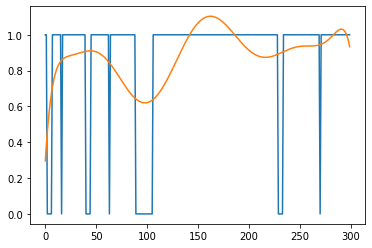

In [141]:
size = 300
lambda_fault = 0.02
lambda_fix = 0.2

temp_fault_process = build_fault_process(size, lambda_fault, lambda_fix)
fitted_func = np.poly1d( np.polyfit(np.arange(size), temp_fault_process, 10) )

plt.plot( temp_fault_process )
plt.plot( fitted_func(np.arange(size)) )
plt.show()

## Stochastic Piecewise Process

In [142]:
def build_step_process(n_steps, dt):
    process = np.random.normal(size=n_steps//dt).repeat(dt)    
    return process[:n_steps]

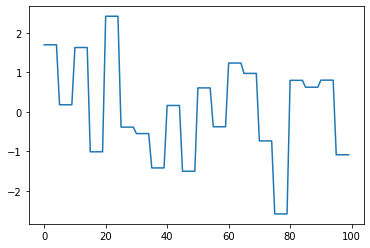

In [155]:
plt.plot(build_pierre_process(100,5))

In [144]:
def test_funct():
    try:
        return x[1]
    except: 
        x = [1,2,1,3]
        return x[1]

In [145]:
dt=5
proc = np.array([])#build_pierre_process(30,dt)
new_steps = 39 - len(proc)
np.random.normal(size=1+new_steps//dt).repeat(dt)
#np.concatenate((proc, np.random.normal(size=new_steps//dt).repeat(dt)))[41]

array([ 0.18564731,  0.18564731,  0.18564731,  0.18564731,  0.18564731,
       -0.30940318, -0.30940318, -0.30940318, -0.30940318, -0.30940318,
        0.58593742,  0.58593742,  0.58593742,  0.58593742,  0.58593742,
        0.53315106,  0.53315106,  0.53315106,  0.53315106,  0.53315106,
        0.23480836,  0.23480836,  0.23480836,  0.23480836,  0.23480836,
       -0.37753008, -0.37753008, -0.37753008, -0.37753008, -0.37753008,
        0.21976689,  0.21976689,  0.21976689,  0.21976689,  0.21976689,
        0.32407036,  0.32407036,  0.32407036,  0.32407036,  0.32407036])

In [102]:
### Define all arguments for 'run_then_optimize_avg()'
all_args = {  
    
    # Parameters for each non-stationary process
    'proc_type': 'step',
    'step_length': 20,
    'sigma_x': 0,   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    'A_x': 0,       'A_theta_behavioural': 0.01,       'A_theta_init': 0.005,      'A_r': 0.01, 
    'psi_x': 0,     'psi_theta_behavioural': 0,      'psi_theta_init': 0,       'psi_r': 0, 
    'phi_x': 0,     'phi_theta_behavioural': 0.1,    'phi_theta_init': 0.1,     'phi_r': 0.05, 
    'B_x': 0,       'B_theta_behavioural': 0,        'B_theta_init': 0,         'B_r': 0, 
    
    # Run options
    'alpha': 300,
    'n_steps_sample': 300,
    'epochs_optim': 600,
    'seed': None,
    'save_folder': "results/no_context/optimization/fixed_t/step_test",
    
    # Optimization settings
    'learning_rate': 1e-4,
    'lamb_J_1': 1,
    'lamb_J_2': 0,
    'lamb_v': 0,
    'mean_reward': True,
    'fix_phi': False,
    'use_modulo': False
}

run_then_optimize( **all_args )

../../IS_non_stationary_RL/importance_sampling/mis_balance_heuristic.py:123: RuntimeWarning: overflow encountered in exp
  return np.exp((mu_1-mu_2)**2/(sigma**2))


(array([[ 0.005     ,  0.        ],
        [ 0.00531623, -0.00018446],
        [ 0.00522514, -0.00013973],
        ...,
        [ 0.0104116 ,  0.00694671],
        [ 0.0104199 ,  0.00699289],
        [ 0.01058917,  0.00720603]]),
 array([0.5337    , 0.53821464, 0.53390604, 0.53665648, 0.53825275,
        0.54055084, 0.54103165, 0.54264109, 0.53881983, 0.53646081,
        0.54044167, 0.5406788 , 0.54050218, 0.54061621, 0.54247946,
        0.53914642, 0.546721  , 0.54131821, 0.54007172, 0.54029185,
        0.54341699, 0.54392668, 0.54597078, 0.54695857, 0.54734649,
        0.5447502 , 0.54243375, 0.54174867, 0.54126936, 0.54499973,
        0.5434919 , 0.54246631, 0.54672511, 0.54680671, 0.54954949,
        0.55064108, 0.55173042, 0.54729037, 0.54835205, 0.54730089,
        0.54721713, 0.54869484, 0.54531917, 0.54632911, 0.54490705,
        0.55090635, 0.5448131 , 0.54612134, 0.54580092, 0.5485827 ,
        0.54827608, 0.54540155, 0.5483146 , 0.54721513, 0.54916599,
        0.5505743 , 0

## Drifting process
The setup is equal to the one of the periodic case, but the non stationary processes are linear ($\mu = At+B$) and not sinusoidal. 
The environment now must be characterized by a NS context distribution for the problem to work, and the goal is to recognize if its value is bigger/smaller than its mean (which will shift over time)

In [147]:
### Define all arguments for 'run_then_optimize_avg()'
all_args = {  
    
    # Parameters for each non-stationary process
    'proc_type': 'drift',
    'step_length': None,
    'sigma_x': 0.5,  'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,  #  'sigma_r': 0.5,  
    'A_x': 0.01,      'A_theta_behavioural': 0.01,       'A_theta_init': 0.005,      'A_r': 0.01, 
    'psi_x': None,     'psi_theta_behavioural': None,      'psi_theta_init': None,       'psi_r': None, 
    'phi_x': None,     'phi_theta_behavioural': None,    'phi_theta_init': None,     'phi_r': None, 
    'B_x': 0,       'B_theta_behavioural': 0,        'B_theta_init': 0,         'B_r': 0, 
    
    # Run options
    'alpha': 150,
    'n_steps_sample': 150,
    'epochs_optim': 5000,
    'seed': None,
    'save_folder': "results/optimization/fixed_t/5000STEPS_drift_optimize-0.02J1-1var_beh=opt_lr2*1e-4",
    
    # Optimization settings
    'learning_rate': 2*1e-4,
    'lamb_J_1': 0.02,
    'lamb_J_2': 0,
    'lamb_v': 1,
    'mean_reward': True,
    'fix_phi': False,
    'use_modulo': False
}

run_then_optimize( **all_args )

(array([[ 5.00000000e-03,  0.00000000e+00],
        [ 4.39227792e-03, -3.04143600e-06],
        [ 4.15094436e-03,  1.73170067e-05],
        ...,
        [ 5.99489380e-05,  1.09445351e-01],
        [-1.01873517e-04,  1.09150614e-01],
        [ 1.81651887e-04,  1.09372148e-01]]),
 array([0.56209052, 0.56803149, 0.56249869, ..., 0.54659389, 0.54239055,
        0.54623445]),
 array([7.62313966, 7.19424207, 6.24864943, ..., 1.00272318, 1.00786796,
        1.02505802]),
 [0.01, 0],
 0.5994429319374456)

## Vasicek Process
Here we don't use contexts, so the agent has to guess if the value of the reward process (represented by the vasicek process) is above or below zero.
The Vascek process is gyven by $dr_{t}=a(b-r_{t})\,dt+\sigma \,dW_{t}$.

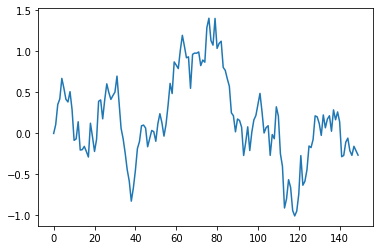

In [46]:
proc = np.zeros(150)
for i in range(1,len(proc)):
    proc[i] = proc[i-1] - 0.05*(proc[i-1]) + np.random.normal(scale=0.2)
plt.plot(proc)

In [45]:
### Define all arguments for 'run_then_optimize_avg()'
all_args = {  
    
    # Parameters for each non-stationary process
    'proc_type': 'vasicek',
    'step_length': None,
    'sigma_x': 0,   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,   'sigma_r': 1, 
    'A_x': 0,       'A_theta_behavioural': 0,       'A_theta_init': 0,            'A_r': 0.05, 
    'psi_x': None,     'psi_theta_behavioural': 0,      'psi_theta_init': 0.05,    'psi_r': 0, 
    'phi_x': None,     'phi_theta_behavioural': 0.1,    'phi_theta_init': 0.1,     'phi_r': 0, 
    'B_x': None,       'B_theta_behavioural': 0,        'B_theta_init': 0,         'B_r': 0, 
    
    # Run options
    'alpha': 300,
    'n_steps_sample': 300,
    'epochs_optim': 1000,
    'seed': None,
    'save_folder': "results/optimization/fixed_t/vasicek_lin_lr1e-4_opt-J1",
    
    # Optimization settings
    'learning_rate': 1e-4,
    'grad_replicas': 1, 
    'lamb_J_1': 1,
    'lamb_J_2': 0,
    'lamb_v': 0,
    'mean_reward': True,
    'fix_phi': False,
    'use_modulo': False
}

run_then_optimize( **all_args )

TypeError: run_then_optimize() got an unexpected keyword argument 'proc_type'

In [233]:
n=['a','b','c','d']
x=np.array([[1,2,3,4],[5,6,7,8]])
dict(zip(n, x.T.reshape(4,-1)))
x.T.reshape(4,1,-1)

array([[[1, 5]],

       [[2, 6]],

       [[3, 7]],

       [[4, 8]]])

## PARALLEL OPTIMIZATION - Any environment

In [136]:
### Import funtion that "does everything"
import sys
sys.path.insert(1, ../../IS_non_stationary_RL/)
from compare_optim import run_then_optimize_compare
from policy.hyperpolicy_parallel import HyperPolicy
from policy.policy import Policy
import env.contextual_bandits_parallel as cbenv

In [141]:
### Define all arguments for 'run_then_optimize_compare()'
params = {
    
    # Non Stationary Process params
    'sigma_c': 0,   'sigma_r': 0.5,   'sigma_theta_behavioural': 0.1,    'sigma_theta_init': 0.1,
    'A_c': 0,       'A_r': 2,      'A_theta_behavioural': 2,       'A_theta_init': 2,         
    'psi_c': 0,     'psi_r': 0,       'psi_theta_behavioural': 0,        'psi_theta_init': [-1,-0.5,0,0.5,1],      
    'phi_c': 0,     'phi_r': 0.05,    'phi_theta_behavioural': 0.05,     'phi_theta_init': 0.1,     
    'B_c': 0,        'B_r': 0,         'B_theta_behavioural': 0,          'B_theta_init': 0,      
    
    # Objects to use
    'hyperpolicy_class': HyperPolicy, 
    'policy_class': Policy, 
    'env_class': cbenv.PeriodicBandit, 
    
    # Optimization settings
    'n_seeds': 1,
    'epochs_optim':500,
    'optimizer_class':RMSProp,
    'learning_rate':2*1e-4, 
    'lamb_J_1':1, 
    'lamb_J_2':0, 
    'lamb_v':0, 
    'R_inf':1,
    'grad_replicas':1, 
    
    # General options
    'seed':None, 
    'n_steps_sample':200,
    'alpha':200, 
    'beta':1,
    'save_folder':"results/optimization/parallel/drift_test_many_A",   
    'mean_reward':True, 
    'use_modulo':False
}
    
run_then_optimize_compare( **params )

{'sigma_c': 0.5, 'sigma_r': 0, 'sigma_theta_behavioural': 0.1, 'sigma_theta_init': 0.1, 'A_c': 0.01, 'A_r': 0.01, 'A_theta_behavioural': 0.01, 'A_theta_init': [0, 0.5, 1, 1.5, 2], 'psi_c': 0, 'psi_r': 0, 'psi_theta_behavioural': 0, 'psi_theta_init': [-1, -0.5, 0, 0.5, 1], 'phi_c': 1, 'phi_r': 0.05, 'phi_theta_behavioural': 0.05, 'phi_theta_init': 0.1, 'B_c': 0, 'B_r': 0, 'B_theta_behavioural': 0, 'B_theta_init': 0, 'hyperpolicy_class': <class 'policy.hyperpolicy_parallel.HyperPolicy'>, 'policy_class': <class 'policy.policy.Policy'>, 'env_class': <class 'env.contextual_bandits_parallel.PeriodicBandit'>, 'epochs_optim': 500, 'optimizer_class': <class 'optimization.optimizers_parallel.RMSProp'>, 'learning_rate': 0.0002, 'lamb_J_1': 1, 'lamb_J_2': 0, 'lamb_v': 0, 'R_inf': 1, 'grad_replicas': 3, 'seed': None, 'n_steps_sample': 200, 'alpha': 200, 'beta': 1, 'save_folder': 'results/optimization/parallel/drift_test_many_A', 'mean_reward': True, 'use_modulo': False, 'n_seeds': 1}
[<env.contextu

Process ForkPoolWorker-12:
Process ForkPoolWorker-11:
Process ForkPoolWorker-10:
Traceback (most recent call last):
  File "/home/francesco/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/francesco/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/francesco/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/francesco/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/francesco/anaconda3/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/francesco/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/francesco/anaconda3/lib/python3.8/mul

KeyboardInterrupt: 

  File "../../IS_non_stationary_RL/policy/hyperpolicy_parallel.py", line 74, in future_return_gradient
    sum_log_grad = np.stack([HyperPolicy.log_derivative_nu(nu, thetas[idx], np.array([k]), t_shift=t_shift) for k in idx])
  File "../../IS_non_stationary_RL/optimization/mis_optimization_parallel.py", line 76, in objective_gradient
    + lamb_j_2 * nu_class.future_return_gradient(rewards, thetas, nu, t, t_shift=t_shift, alpha=alpha, beta=beta) \
  File "../../IS_non_stationary_RL/optimization/mis_optimization_parallel.py", line 76, in objective_gradient
    + lamb_j_2 * nu_class.future_return_gradient(rewards, thetas, nu, t, t_shift=t_shift, alpha=alpha, beta=beta) \
  File "../../IS_non_stationary_RL/policy/hyperpolicy_parallel.py", line 74, in <listcomp>
    sum_log_grad = np.stack([HyperPolicy.log_derivative_nu(nu, thetas[idx], np.array([k]), t_shift=t_shift) for k in idx])
  File "../../IS_non_stationary_RL/policy/hyperpolicy_parallel.py", line 43, in log_derivative_nu
    return

# Guaussian Processes (USELESS)
Prior covariance given by the kernel matrix, then:
 - `normalize_y = False`: prior mean is a constant equal to zero
 - `normalize_y = True`:  prior mean is a constant equal to the mean of the data
 
Hyperparameters of the kernel are optimized during fitting of GaussianProcessRegressor by maximizing the log-marginal-likelihood (LML) based on the passed optimizer.

`n_restarts_optimizer`: Number of optimization procedures to perform (because we expect that it has likelihood has many local max)

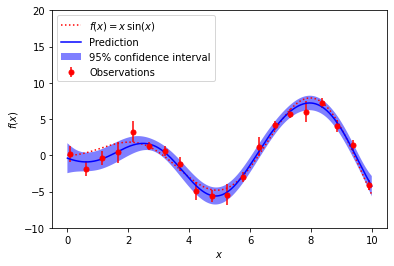

In [3]:
### FIRST TEST WITH RBF ###


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Product, ConstantKernel as C


def f(x):
    """The function to predict."""
    return x * np.sin(x)


# -------------------------------------------------------

# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
kernel = RBF()*C()
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy**2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

Now let's use a Gaussian Process with RBF to model the Vasicek Process of a contextual bandit

In [19]:
import utils.processes as proc
from env.contextual_bandits_parallel import VasicekBandit

# Build Environment and extract process
env = VasicekBandit(A_r=0.05, B_r=0, sigma_r=0.1)
last_val, process = proc.vasicek_process(env.r_process, t=50)
#plt.plot(process.history)

# Build Gaussian process to fit the process
kernel = RBF(length_scale_bounds=(0.1, 1000.0))*C()
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01,
                              n_restarts_optimizer=0)
gp.fit(np.arange(len(process.history)).reshape(-1,1), process.history)
gp.kernel_.get_params()

NameError: name 'RBF' is not defined

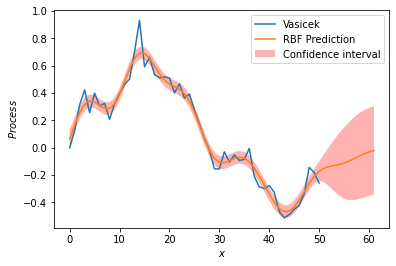

In [11]:
# Plot fitted function
x = np.linspace(0, len(process.history)+10, 2000)
y_pred, sigma = gp.predict(x.reshape(-1,1), return_std=True)

plt.plot(process.history, label='Vasicek')
plt.plot(x, y_pred, label='RBF Prediction')
plt.fill_between(x, y_pred-sigma, y_pred+sigma,
                 alpha=0.3, fc='r', label='Confidence interval')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$Process$')
plt.show()

In [790]:

from scipy.linalg import cholesky, cho_solve, solve_triangular

kernel = RBF(length_scale_bounds=(0.1, 1000.0))*C()
gp_test = GaussianProcessRegressor(kernel=kernel, alpha=0.02,
                                   n_restarts_optimizer=0)

# make gp_test correct and good at predicting
gp_test.kernel.k1.length_scale = np.exp(gp.kernel_.theta)[0]
gp_test.kernel.k2.constant_value = np.exp(gp.kernel_.theta)[1]
gp_test.kernel_ = gp_test.kernel

gp_test.X_train_ = np.copy( np.arange(len(process.history)).reshape(-1,1) )
gp_test.y_train_ = np.copy( process.history )
gp_test._y_train_mean = np.zeros(1)
gp_test._y_train_std = 1

K = gp_test.kernel_(gp_test.X_train_)
K[np.diag_indices_from(K)] += gp_test.alpha

gp_test.L_ = cholesky(K, lower=True)  # Line 2
# self.L_ changed, self._K_inv needs to be recomputed
gp_test._K_inv = None
gp_test.alpha_ = cho_solve((gp_test.L_, True), gp_test.y_train_)

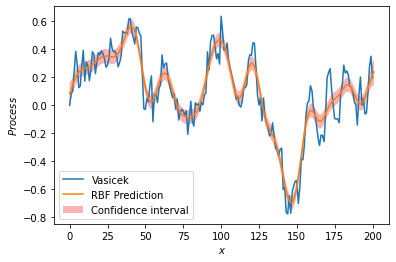

In [791]:
# Plot fitted function
x = np.linspace(0, len(process.history), 2000)
y_pred, sigma = gp_test.predict(x.reshape(-1,1), return_std=True)

plt.plot(process.history, label='Vasicek')
plt.plot(x, y_pred, label='RBF Prediction')
plt.fill_between(x, y_pred-sigma, y_pred+sigma,
                 alpha=0.3, fc='r', label='Confidence interval')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$Process$')
plt.show()

# Radial Basis Function Neural Network
### Start building a RBNN to solve a regression problem

In [62]:
x=np.array([[1,2,3], [4,5,6]])
y=np.array([1,2,3])
print(x.shape)
print(y.shape)
x.mean(axis=1)

(2, 3)
(3,)


array([2., 5.])

In [65]:

class RBF_Net(object):
   
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, rbf_nodes=5, lr=0.01, epochs=100, sigma_rbf=10, inferStds=False):
        
        self.rbf_nodes = rbf_nodes
        self.lr = lr
        self.epochs = epochs
        self.inferStds = inferStds
         
        #self.centers = 100*np.random.rand(rbf_nodes)
        self.centers = np.linspace(0, 100, rbf_nodes)
        self.w = np.random.normal(size=rbf_nodes)
        self.b = np.random.normal(size=1)
        if inferStds:
            self.stds = np.random.normal(loc=sigma_rbf, size=rbf_nodes)
            self.n_params = 3*rbf_nodes + 1
        else:
            self.stds = np.repeat(sigma_rbf, rbf_nodes)
            self.n_params = 2*rbf_nodes + 1
    
    
    def RBF(self, x, c, sigma): # for 1-dim inputs
            return np.exp( -(x-c)**2 / (2*sigma**2) )
        
        
    def forward(self, x):
        x = np.array([self.RBF(x, c, s) for c, s in zip(self.centers, self.stds)]).T
        return x.dot(self.w) + self.b
    
    
    def grad_wrt_y_pred(self, x):
        rbf_out = np.array([self.RBF(x, c, s) for c, s in zip(self.centers, self.stds)]).T
        dy_dc = [ self.w[i] * rbf_out[:,i]*(x-self.centers[i]) for i in range(self.rbf_nodes) ]
        dy_dw = [ rbf_out[:,i] for i in range(self.rbf_nodes) ]
        dy_db = 1
        
        if self.inferStds:
            dy_ds = [ self.w[i] * rbf_out[:,i]*(x-self.centers[i])**2/self.stds[i]**3 for i in range(self.rbf_nodes) ]
            return np.array(dy_dc), np.array(dy_dw), dy_db, np.array(dy_ds)
        else:
            return np.array(dy_dc), np.array(dy_dw), dy_db
        
        
        
    def fit(self, X, y):
        
        # training
        for epoch in range(self.epochs):
                
            # forward pass
            y_pred = self.forward(X)
            MSE = np.mean( (y - y_pred)**2 )
            #print('MSE: {0:.2f}'.format(MSE))
            
            # Compute gradient
            grad_errors = -2*(y-y_pred)
            grad_nn = self.grad_wrt_y_pred(X)    
                        
            # online update
            #self.centers = self.centers - self.lr * np.mean(grad_errors*grad_nn[0], axis=1)
            self.w = self.w - self.lr * np.mean(grad_errors*grad_nn[1], axis=1)
            self.b = self.b - self.lr * np.mean(grad_errors*grad_nn[2])
            if self.inferStds:
                self.stds = self.stds - self.lr * np.mean(grad_errors*grad_nn[4], axis=1)
            
            # Store params
            #self.params_evol = np.concatenate((self.params_evol, [[self.centers, self.stds, self.w, self.b]]), axis=0)            
            #self.params_evol = np.concatenate((self.params_evol, [[self.centers, self.w, self.b]]), axis=0)

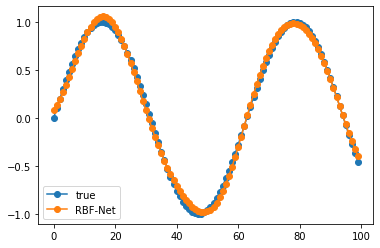

In [66]:
X=np.arange(100)
y=np.sin(X*0.1)

rbfnet = RBF_Net(rbf_nodes=15, lr=0.1, epochs=1000)
rbfnet.fit(X, y)

y_pred = rbfnet.forward(X)

plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
plt.show()

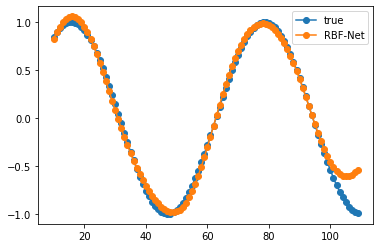

In [67]:
# CAN IT ADAPT? LET'S SEE HERE
X=np.arange(10, 100+10)
y=np.sin(X*0.1)

y_pred = rbfnet.forward(X)

plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
plt.show()

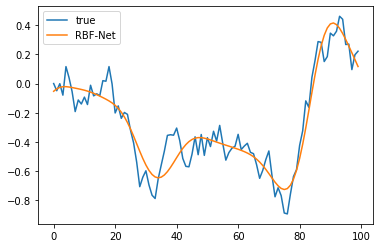

In [69]:
# Build Environment and extract process
x = np.arange(100)
env = VasicekBandit(A_r=0.05, B_r=0, sigma_r=0.1)
_, process = proc.vasicek_process(env.r_process, t=len(x)-1)
y = process.history

rbfnet = RBF_Net(rbf_nodes=10, lr=0.1, epochs=1000, sigma_rbf=6)
rbfnet.fit(x, y)

y_pred = rbfnet.forward(x)

plt.plot(x, y, '-', label='true')
plt.plot(x, y_pred, '-', label='RBF-Net')
plt.legend()
plt.show()

(-0.6, 0.7)

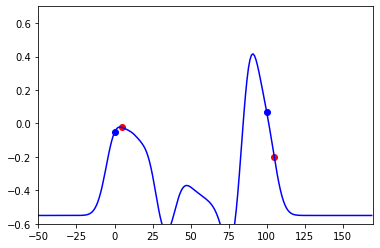

In [75]:
# USED ONLY TO DO PRETTY PLOTS
x = np.arange(-50, 170)
y_pred = rbfnet.forward(x)
plt.plot(x, y_pred, '-', label='RBF-Net', c='b')
plt.scatter([0,100], [rbfnet.forward(0), rbfnet.forward(100)], c='b')
#plt.plot(x, rbfnet.forward(x-10), '-', label='RBF-Net', c='r')
plt.scatter([5,105], [rbfnet.forward(5), rbfnet.forward(105)], c='r')
plt.xlim(-50,170)
plt.ylim(-0.6,0.7)

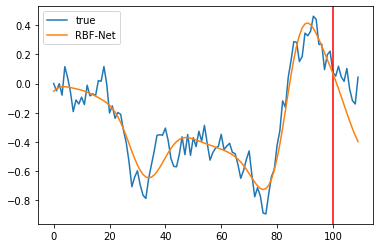

In [73]:
# CAN IT ADAPT? LET'S SEE HERE
x = np.arange(100+10)
_, process = proc.vasicek_process(env.r_process, t=len(x)-1)
y = process.history

y_pred = rbfnet.forward(x)

plt.plot(x, y, '-', label='true')
plt.axvline(x=100, c='r')
plt.plot(x, y_pred, '-', label='RBF-Net')
plt.legend()
plt.show()

## Financial data

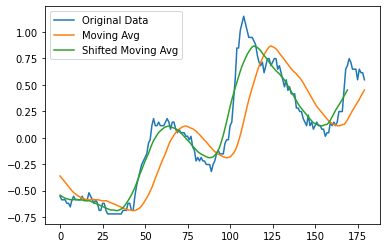

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

data = np.loadtxt('UNRATE.csv', usecols=1, skiprows=1, delimiter=",")[200:400]
data = (data-data.mean())/(2*data.std())

avg_steps = 20
mov_avg_data = np.array([ data[i:i+avg_steps].mean() for i in range(len(data)-avg_steps) ])

plt.plot( data[avg_steps:], label='Original Data')
plt.plot( mov_avg_data, label='Moving Avg')
plt.plot( mov_avg_data[avg_steps//2:], label='Shifted Moving Avg')
plt.legend()
plt.show()

### RBF-based Hyperpolicy

In [1]:
# autoreload allows to update modules without resetting the kernel 
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Import funtion that "does everything"
import sys, os, datetime
sys.path.insert(1, '../../IS_non_stationary_RL/')

from policy.hyperpolicy_pytorch import RBF_Policy
from utils.save_results_pytorch import save_run
from optimize_pytorch import run_then_optimize, intertwine_run_optimize
from pareto_analysis import pareto_frontier_J1_vs_Var, pareto_frontier_J2_vs_Var, pareto_frontier_J1_J2_vs_Var

In [6]:
"""
# Define all arguments for 'run_then_optimize_avg()' PERIODIC and RBF_policy
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.PeriodicBandit',     'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0.5,               'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 15, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': True,
    
    # Run options
    'alpha': 150,
    'beta': 1,
    'n_steps_sample': 150,
    'epochs_optim': 600,
    'seeds': [123,456,789],
    #'save_folder': "results/optimization/fixed_t/RBF_periodic_opt(1,0,1)_convex_20-beta_lr1e-2_3mean-grad",#_5seeds",
    'save_folder': "results/optimization/fixed_t/pytorch_test",
    
    # Optimization settings
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'lamb_J_1': 1,
    'lamb_J_2': 1,
    'lamb_v': 5000,
    'mean_reward': True,
    'use_modulo': False,
}
"""

"""

# Define all arguments for 'run_then_optimize_avg()' VASICEK and RBF_policy
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.VasicekBandit',    'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0.5,  'sigma_r': 0.5,   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    'A_c': 0.05,        'A_r': 0.05,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,      'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,    'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    'B_c': 0,        'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 15, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': True,
    
    # Run options
    'alpha': 150,
    'n_steps_sample': 150,
    'epochs_optim': 500,
    #'seeds': 20,
    'save_folder': "results/optimization/fixed_t/RBF_vasicek_opt(05,1,0)_infer-stds_3mean-grad_1000epochs",
    'save_folder': "results/optimization/fixed_t/RBF_vasicek_opt(0,1,0)",
    
    # Optimization settings
    'learning_rate': 1e-2,
    'grad_replicas': 3, 
    'lamb_J_1': 0,
    'lamb_J_2': 1,
    'lamb_v': 0,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}
"""


"""
# Define all arguments for 'run_then_optimize_avg()' UNRATE bandit and RBF_policy
all_args = {
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.UnrateBandit_dynamics',     'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0,                   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    #'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    #'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 20, 'sigma_rbf': 4, 'infer_centers': True, 'infer_stds': True, 
    
    # Run options
    'alpha': 150,
    'beta': 10,
    'MA_steps': 20,
    'n_steps_sample': 150,
    'epochs_optim': 500,
    #'seeds': [12,34,56],
    'save_folder': "results/optimization/fixed_t/RBF_unrate_dyn_opt(1,1,3)_20rbf-nodes_3mean-grad",#_5seeds",
    #'save_folder': "results/optimization/fixed_t/pytorch_RBF_test",
    
    # Optimization settings
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'lamb_J_1': 1,
    'lamb_J_2': 1,
    'lamb_v': 3,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}
"""


# Define all arguments for 'run_then_optimize_avg()' UNRATE_bandit with MA and RBF_policy
all_args = {
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.UnrateBandit_moving_avg',     'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0,                   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    #'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    #'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 30, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': True, 
    
    # Run options
    'alpha': 150,
    'beta': 10,
    'MA_steps': 20,
    'n_steps_sample': 150,
    'epochs_optim': 1000,
    #'seeds': [12,34,56],
    'save_folder': "results/optimization/fixed_t/RBF_unrate_MA_opt(1,1,3)_40rbf-nodes_over2*150",#_5seeds",
    #'save_folder': "results/optimization/fixed_t/pytorch_RBF_test",
    
    # Optimization settings
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'lamb_J_1': 1,
    'lamb_J_2': 1,
    'lamb_v': 3,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}


"""
# Define all arguments for 'run_then_optimize_avg()' UNRATE bandit and NN_policy
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.UnrateBandit_dynamics',     'hyperpolicy_class': 'hypol.NeuralPolicy',
    'sigma_c': 0,                   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    #'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    #'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    #'rbf_nodes': 15, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': True,
    'n_neurons': [16,16,16],
    
    # Run options
    'alpha': 150,
    'beta': 1,
    'n_steps_sample': 150,
    'epochs_optim': 5000,
    #'seeds': 123,
    #'save_folder': "results/optimization/fixed_t/RBF_unrate_dyn_opt(1,0,0)_lr1e-2_3mean-grad",#_5seeds",
    'save_folder': "results/optimization/fixed_t/pytorch_RBF_test",
    
    # Optimization settings
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'lamb_J_1': 1,
    'lamb_J_2': 0,
    'lamb_v': 0,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}
"""

run_then_optimize( **all_args )

05/17/2021 10:57:56: Sampling seed None.
05/17/2021 10:57:56: Optimize seed None.
100%|██████████| 1000/1000 [01:48<00:00,  9.24it/s]
05/17/2021 10:59:44: Save seed None.


array([[125.78073499,   9.02155412,   2.11652255]])

05/04/2021 11:41:39: Sampling seed 123.
05/04/2021 11:41:39: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 1 out of 15


100%|██████████| 600/600 [02:46<00:00,  3.61it/s]
05/04/2021 11:44:25: Save seed 123.
05/04/2021 11:44:27: Sampling seed 456.
05/04/2021 11:44:27: Optimize seed 456.
100%|██████████| 600/600 [02:49<00:00,  3.54it/s]
05/04/2021 11:47:17: Save seed 456.
05/04/2021 11:47:19: Sampling seed 789.
05/04/2021 11:47:19: Optimize seed 789.
100%|██████████| 600/600 [02:48<00:00,  3.56it/s]
05/04/2021 11:50:07: Save seed 789.
05/04/2021 11:50:10: Sampling seed 123.
05/04/2021 11:50:10: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 2 out of 15


100%|██████████| 600/600 [02:48<00:00,  3.55it/s]
05/04/2021 11:52:59: Save seed 123.
05/04/2021 11:53:01: Sampling seed 456.
05/04/2021 11:53:01: Optimize seed 456.
100%|██████████| 600/600 [02:47<00:00,  3.58it/s]
05/04/2021 11:55:49: Save seed 456.
05/04/2021 11:55:51: Sampling seed 789.
05/04/2021 11:55:51: Optimize seed 789.
100%|██████████| 600/600 [02:48<00:00,  3.55it/s]
05/04/2021 11:58:40: Save seed 789.
05/04/2021 11:58:42: Sampling seed 123.
05/04/2021 11:58:42: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 3 out of 15


100%|██████████| 600/600 [02:48<00:00,  3.57it/s]
05/04/2021 12:01:30: Save seed 123.
05/04/2021 12:01:33: Sampling seed 456.
05/04/2021 12:01:33: Optimize seed 456.
100%|██████████| 600/600 [02:48<00:00,  3.55it/s]
05/04/2021 12:04:22: Save seed 456.
05/04/2021 12:04:24: Sampling seed 789.
05/04/2021 12:04:24: Optimize seed 789.
100%|██████████| 600/600 [02:48<00:00,  3.55it/s]
05/04/2021 12:07:13: Save seed 789.
05/04/2021 12:07:18: Sampling seed 123.
05/04/2021 12:07:18: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 4 out of 15


100%|██████████| 600/600 [02:49<00:00,  3.53it/s]
05/04/2021 12:10:08: Save seed 123.
05/04/2021 12:10:10: Sampling seed 456.
05/04/2021 12:10:11: Optimize seed 456.
100%|██████████| 600/600 [02:54<00:00,  3.43it/s]
05/04/2021 12:13:05: Save seed 456.
05/04/2021 12:13:08: Sampling seed 789.
05/04/2021 12:13:08: Optimize seed 789.
100%|██████████| 600/600 [02:50<00:00,  3.52it/s]
05/04/2021 12:15:58: Save seed 789.
05/04/2021 12:16:01: Sampling seed 123.
05/04/2021 12:16:01: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 5 out of 15


100%|██████████| 600/600 [03:04<00:00,  3.25it/s]
05/04/2021 12:19:06: Save seed 123.
05/04/2021 12:19:08: Sampling seed 456.
05/04/2021 12:19:08: Optimize seed 456.
100%|██████████| 600/600 [02:57<00:00,  3.37it/s]
05/04/2021 12:22:06: Save seed 456.
05/04/2021 12:22:08: Sampling seed 789.
05/04/2021 12:22:08: Optimize seed 789.
100%|██████████| 600/600 [02:48<00:00,  3.57it/s]
05/04/2021 12:24:57: Save seed 789.
05/04/2021 12:25:00: Sampling seed 123.
05/04/2021 12:25:00: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 6 out of 15


100%|██████████| 600/600 [02:48<00:00,  3.56it/s]
05/04/2021 12:27:48: Save seed 123.
05/04/2021 12:27:51: Sampling seed 456.
05/04/2021 12:27:51: Optimize seed 456.
100%|██████████| 600/600 [02:50<00:00,  3.53it/s]
05/04/2021 12:30:41: Save seed 456.
05/04/2021 12:30:43: Sampling seed 789.
05/04/2021 12:30:43: Optimize seed 789.
100%|██████████| 600/600 [02:45<00:00,  3.62it/s]
05/04/2021 12:33:29: Save seed 789.
05/04/2021 12:33:31: Sampling seed 123.
05/04/2021 12:33:31: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 7 out of 15


100%|██████████| 600/600 [02:45<00:00,  3.63it/s]
05/04/2021 12:36:17: Save seed 123.
05/04/2021 12:36:20: Sampling seed 456.
05/04/2021 12:36:20: Optimize seed 456.
100%|██████████| 600/600 [02:44<00:00,  3.65it/s]
05/04/2021 12:39:04: Save seed 456.
05/04/2021 12:39:07: Sampling seed 789.
05/04/2021 12:39:07: Optimize seed 789.
100%|██████████| 600/600 [02:43<00:00,  3.66it/s]
05/04/2021 12:41:51: Save seed 789.
05/04/2021 12:41:53: Sampling seed 123.
05/04/2021 12:41:53: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 8 out of 15


100%|██████████| 600/600 [02:44<00:00,  3.65it/s]
05/04/2021 12:44:37: Save seed 123.
05/04/2021 12:44:40: Sampling seed 456.
05/04/2021 12:44:40: Optimize seed 456.
100%|██████████| 600/600 [02:46<00:00,  3.61it/s]
05/04/2021 12:47:26: Save seed 456.
05/04/2021 12:47:28: Sampling seed 789.
05/04/2021 12:47:28: Optimize seed 789.
100%|██████████| 600/600 [02:44<00:00,  3.64it/s]
05/04/2021 12:50:13: Save seed 789.
05/04/2021 12:50:16: Sampling seed 123.
05/04/2021 12:50:16: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 9 out of 15


100%|██████████| 600/600 [02:44<00:00,  3.65it/s]
05/04/2021 12:53:01: Save seed 123.
05/04/2021 12:53:03: Sampling seed 456.
05/04/2021 12:53:03: Optimize seed 456.
100%|██████████| 600/600 [02:45<00:00,  3.63it/s]
05/04/2021 12:55:48: Save seed 456.
05/04/2021 12:55:50: Sampling seed 789.
05/04/2021 12:55:50: Optimize seed 789.
100%|██████████| 600/600 [02:45<00:00,  3.61it/s]
05/04/2021 12:58:36: Save seed 789.
05/04/2021 12:58:39: Sampling seed 123.
05/04/2021 12:58:39: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 10 out of 15


100%|██████████| 600/600 [02:45<00:00,  3.63it/s]
05/04/2021 13:01:24: Save seed 123.
05/04/2021 13:01:27: Sampling seed 456.
05/04/2021 13:01:27: Optimize seed 456.
100%|██████████| 600/600 [02:45<00:00,  3.63it/s]
05/04/2021 13:04:12: Save seed 456.
05/04/2021 13:04:14: Sampling seed 789.
05/04/2021 13:04:14: Optimize seed 789.
100%|██████████| 600/600 [02:45<00:00,  3.63it/s]
05/04/2021 13:07:00: Save seed 789.
05/04/2021 13:07:02: Sampling seed 123.
05/04/2021 13:07:02: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 11 out of 15


100%|██████████| 600/600 [02:46<00:00,  3.61it/s]
05/04/2021 13:09:48: Save seed 123.
05/04/2021 13:09:52: Sampling seed 456.
05/04/2021 13:09:52: Optimize seed 456.
100%|██████████| 600/600 [02:45<00:00,  3.63it/s]
05/04/2021 13:12:37: Save seed 456.
05/04/2021 13:12:39: Sampling seed 789.
05/04/2021 13:12:39: Optimize seed 789.
100%|██████████| 600/600 [02:45<00:00,  3.62it/s]
05/04/2021 13:15:25: Save seed 789.
05/04/2021 13:15:27: Sampling seed 123.
05/04/2021 13:15:27: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 12 out of 15


100%|██████████| 600/600 [02:45<00:00,  3.64it/s]
05/04/2021 13:18:12: Save seed 123.
05/04/2021 13:18:14: Sampling seed 456.
05/04/2021 13:18:14: Optimize seed 456.
100%|██████████| 600/600 [02:45<00:00,  3.62it/s]
05/04/2021 13:21:00: Save seed 456.
05/04/2021 13:21:02: Sampling seed 789.
05/04/2021 13:21:02: Optimize seed 789.
100%|██████████| 600/600 [02:46<00:00,  3.61it/s]
05/04/2021 13:23:49: Save seed 789.
05/04/2021 13:23:51: Sampling seed 123.
05/04/2021 13:23:51: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 13 out of 15


100%|██████████| 600/600 [02:46<00:00,  3.59it/s]
05/04/2021 13:26:38: Save seed 123.
05/04/2021 13:26:40: Sampling seed 456.
05/04/2021 13:26:40: Optimize seed 456.
100%|██████████| 600/600 [02:45<00:00,  3.62it/s]
05/04/2021 13:29:26: Save seed 456.
05/04/2021 13:29:28: Sampling seed 789.
05/04/2021 13:29:28: Optimize seed 789.
100%|██████████| 600/600 [02:46<00:00,  3.60it/s]
05/04/2021 13:32:15: Save seed 789.
05/04/2021 13:32:19: Sampling seed 123.
05/04/2021 13:32:19: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 14 out of 15


100%|██████████| 600/600 [02:45<00:00,  3.62it/s]
05/04/2021 13:35:05: Save seed 123.
05/04/2021 13:35:07: Sampling seed 456.
05/04/2021 13:35:07: Optimize seed 456.
100%|██████████| 600/600 [02:45<00:00,  3.63it/s]
05/04/2021 13:37:52: Save seed 456.
05/04/2021 13:37:55: Sampling seed 789.
05/04/2021 13:37:55: Optimize seed 789.
100%|██████████| 600/600 [02:47<00:00,  3.59it/s]
05/04/2021 13:40:42: Save seed 789.
05/04/2021 13:40:44: Sampling seed 123.
05/04/2021 13:40:44: Optimize seed 123.
  0%|          | 0/600 [00:00<?, ?it/s]

Running optimization 15 out of 15


100%|██████████| 600/600 [02:45<00:00,  3.62it/s]
05/04/2021 13:43:30: Save seed 123.
05/04/2021 13:43:32: Sampling seed 456.
05/04/2021 13:43:32: Optimize seed 456.
100%|██████████| 600/600 [02:45<00:00,  3.63it/s]
05/04/2021 13:46:17: Save seed 456.
05/04/2021 13:46:19: Sampling seed 789.
05/04/2021 13:46:19: Optimize seed 789.
100%|██████████| 600/600 [02:46<00:00,  3.60it/s]
05/04/2021 13:49:06: Save seed 789.


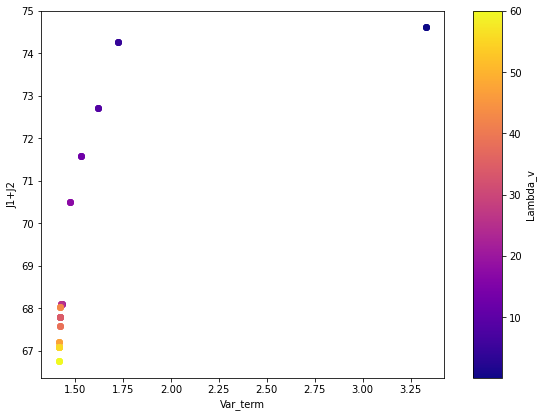

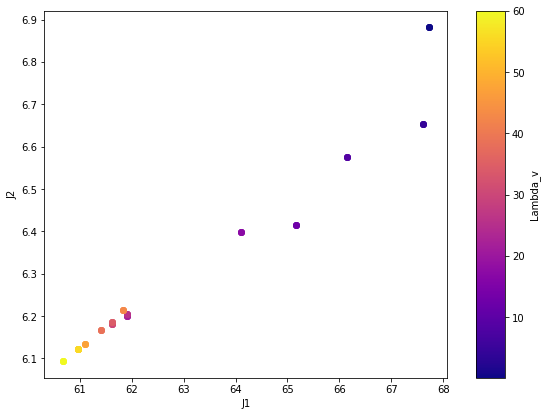

In [27]:

# Define all arguments for 'pareto_frontier_var_J1()' with PERIODIC env
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.PeriodicBandit',     'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0.5,               'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 11, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': True,
    
    # Run options
    'beta': 10,
    'two_step_min_psi': True,
    'alpha': 100,
    'n_steps_sample': 100,
    'epochs_optim': 600,
    'seeds': [123,456,789],
    #'seeds': [1,2,3],
    'save_folder': 'results/optimization/pareto/lv-(1,60)_RBF_periodic_10-beta_lr1e-2_3-mean-grad_3-seeds',
    #'save_folder': "results/optimization/pareto/pytorch_RBF_test",
    
    # Optimization settings
    #'lambda_v_values': np.linspace(0.1,8,15),   # lv for J2/var beta=10
    #'lambda_v_values': np.linspace(0.1,5000,20), # lv for (J1+J2)/var beta=1
    'lambda_v_values': np.linspace(0.1,60,15), # lv for (J1+J2)/var beta=10
    
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'average_frontier': True,
    'mean_reward': True,
    'use_modulo': False
}

pareto_frontier_J1_J2_vs_Var( **all_args )

In [13]:
from time import time
#from optimize_pytorch import intertwine_run_optimize

"""
### Define all arguments for 'intertwine_run_optimize()'   PERIODIC ENV and PERIODIC HYPERPOLICY
all_args = {  
    
    # Parameters for each non-stationary process
    #'sigma_c': 0.5,               'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    #'sigma_x': 0.5,  'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,    'sigma_r': 0.1, 
    #'A_x': 3,      'A_theta_behavioural': 3,       'A_theta_init': 3,        'A_r': 3, 
    #'psi_x': 0,    'psi_theta_behavioural': 0,     'psi_theta_init': 0.5,      'psi_r': 0, 
    #'phi_x': 0.1,    'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.1,   'phi_r': 0.1, 
    #'B_x': 0,      'B_theta_behavioural': 0,       'B_theta_init': 0.2,        'B_r': 0, 

    'env_class': 'cbenv.PeriodicBandit',    'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0.5,               'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 15, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': False,
    
    # Run options
    'alpha': 150,
    'n_init_samples': 150,
    'n_optim_samples': 50,
    'optim_every': 1,
    'epochs_optim': 100,
    'seeds': 123456,  # DOES NOT WORK?
    #'save_folder': "results/optimization/intertwine/pytorch_RBF_optJ1_lr1e-2_3mean-grad_infer-cent_boostedR",
    'save_folder': "results/optimization/intertwine/pytorch_RBF_test_",
    
    # Optimization settings
    'grad_replicas': 3,
    'learning_rate': 1e-2,
    'lamb_J_1': 1,
    'lamb_J_2': 0,
    'lamb_v': 0,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}
"""


"""
### Define all arguments for 'intertwine_run_optimize()'   PERIODIC ENV and RBF
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.PeriodicBandit',    'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0.5,               'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 15, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': False,
    
    # Run options
    'alpha': 150,
    'n_init_samples': 150,
    'n_optim_samples': 200,
    'optim_every': 1,
    'epochs_optim': 1000,
    #'seeds': 123456,  # DOES NOT WORK?
    'save_folder': "results/optimization/intertwine/RBF_periodic_optJ1_lr1e-2_3mean-grad_boostedR_200steps_100-optims",
    #'save_folder': "results/optimization/intertwine/pytorch_RBF_test_",
    
    # Optimization settings
    'grad_replicas': 3,
    'learning_rate': 1e-2,
    'lamb_J_1': 1,
    'lamb_J_2': 0,
    'lamb_v': 1,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}

"""
"""

### Define all arguments for 'intertwine_run_optimize()'       VASICEK ENV with RBF
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.VasicekBandit',    'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0.5,  'sigma_r': 1,   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    'A_c': 0.05,        'A_r': 0.05,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,      'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,    'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    'B_c': 0,        'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 15, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': False,
    #            15               6
    
    
    # Run options
    'alpha': 150,
    'n_init_samples': 150,
    'n_optim_samples': 200,
    'optim_every': 1,
    'epochs_optim': 50,
    'seeds': 12345,
    'save_folder': "results/optimization/intertwine/RBF_Vasicek_optJ1_boostedR_3mean-grad_25rbfs_200steps_50-optims",
    #'save_folder': "results/optimization/intertwine/pytorch_RBF_test_",
    
    # Optimization settings
    'grad_replicas': 3,
    'learning_rate': 1e-2,
    'lamb_J_1': 1,
    'lamb_J_2': 0,
    'lamb_v': 0,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}

"""

"""
# Define all arguments for 'intertwine_run_optimize()' UNRATE bandit and RBF
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.UnrateBandit',     'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0.5,                   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    #'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    #'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 30, 'sigma_rbf': 4, 'infer_centers': True, 'infer_stds': True,
    
    # Run options
    'alpha': 100,
    'beta': 10,
    'n_init_samples': 100,
    'n_optim_samples': 60,
    'optim_every': 1,
    'epochs_optim': 100,
    'first_train': 500,
    'seeds': 123,
    'save_folder': "results/optimization/intertwine/RBF_unrate_opt(1,1,3)_10-beta_100optims_every1_30rbf-over2x100",#_5seeds",
    #'save_folder': "results/optimization/intertwine/pytorch_RBF_test_",
    
    # Optimization settings
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'lamb_J_1': 1,
    'lamb_J_2': 1,
    'lamb_v': 3,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}
"""

"""
# Define all arguments for 'intertwine_run_optimize()' UNRATE_dynamics and RBF
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.UnrateBandit_dynamics',     'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0,                   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    #'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    #'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 20, 'sigma_rbf': 4, 'infer_centers': True, 'infer_stds': True,
    
    # Run options
    'alpha': 100,
    'beta': 10,
    'n_init_samples': 100,
    'n_optim_samples': 60,
    'optim_every': 5,
    'epochs_optim': 300,
    'first_train': None,#500,
    'seeds': [11,12,13],
    'save_folder': "results/optimization/intertwine/RBF_unrate_dyn_opt(1,1,3)_10-beta_300optims_every5_3mean-grad",#_5seeds",
    #'save_folder': "results/optimization/intertwine/pytorch_RBF_test_",
    
    # Optimization settings
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'lamb_J_1': 1,
    'lamb_J_2': 1,
    'lamb_v': 3,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}
"""


# Define all arguments for 'intertwine_run_optimize()' UNRATE_MA and RBF
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.UnrateBandit_moving_avg',     'hyperpolicy_class': 'hypol.RBF_Policy',
    'sigma_c': 0,                   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    #'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    #'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    'rbf_nodes': 25, 'sigma_rbf': 4, 'infer_centers': True, 'infer_stds': True,
    'MA_steps': 20,
    
    # Run options
    'alpha': 100,
    'beta': 10,
    'n_init_samples': 100,
    'n_optim_samples': 60,
    'optim_every': 1,
    'epochs_optim': 30,
    'first_train': 300,
    'seeds': [11,12,13],
    'save_folder': "results/optimization/intertwine/RBF_unrate_dyn_opt(1,1,10)_10-beta_30optims_every1_25rbf-over(a+50)",#_5seeds",
    #'save_folder': "results/optimization/intertwine/pytorch_RBF_test_",
    
    # Optimization settings
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'lamb_J_1': 1,
    'lamb_J_2': 1,
    'lamb_v': 10,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}


"""
# Define all arguments for 'intertwine_run_optimize()' UNRATE bandit and NN
all_args = {  
    
    # Parameters for each non-stationary process
    'env_class': 'cbenv.UnrateBandit_dynamics',     'hyperpolicy_class': 'hypol.NeuralPolicy',
    'sigma_c': 0,                   'sigma_theta_behavioural': 0.1,   'sigma_theta_init': 0.1,
    #'A_c': 1,      'A_r': 1,      #'A_theta_behavioural': 1,       'A_theta_init': 1,        
    #'psi_c': 0,    'psi_r': 0,    #'psi_theta_behavioural': 0,     'psi_theta_init': 0,      
    #'phi_c': 0.1,  'phi_r': 0.1,  #'phi_theta_behavioural': 0.1,   'phi_theta_init': 0.09,   
    #'B_c': 0,       'B_r': 0,     #'B_theta_behavioural': 0,       'B_theta_init': 0,       
    #'rbf_nodes': 15, 'sigma_rbf': 6, 'infer_centers': True, 'infer_stds': True,
    #'n_neurons': [16,16,16],
    
    # Run options
    'alpha': 150,
    'beta': 1,
    'n_init_samples': 150,
    'n_optim_samples': 100,
    'optim_every': 1,
    'epochs_optim': 100,
    'first_train': 500,
    #'seeds': 123,
    'save_folder': "results/optimization/intertwine/NN_unrate-dyn_opt(1,0,0)_100-optims_every-5_3mean-grad",#_5seeds",
    #'save_folder': "results/optimization/intertwine/pytorch_RBF_test_",
    
    # Optimization settings
    'optimizer_class': 'optim.RMSprop',
    'learning_rate': 1e-2,
    'grad_replicas': 3,
    'lamb_J_1': 1,
    'lamb_J_2': 0,
    'lamb_v': 0,
    'mean_reward': True,
    #'fix_phi': False,
    'use_modulo': False
}
"""


### Run optimization with previous args
start = time()
intertwine_run_optimize( **all_args )
end = time()
print(end - start)

05/18/2021 12:15:58: Sampling seed 11.
05/18/2021 12:15:58: Optimize seed 11.
100%|██████████| 30/30 [00:02<00:00, 11.79it/s]
05/18/2021 12:19:15: Save seed 11.
05/18/2021 12:19:16: Sampling seed 12.
05/18/2021 12:19:16: Optimize seed 12.
100%|██████████| 30/30 [00:02<00:00, 12.32it/s]
05/18/2021 12:22:34: Save seed 12.
05/18/2021 12:22:36: Sampling seed 13.
05/18/2021 12:22:36: Optimize seed 13.
100%|██████████| 30/30 [00:02<00:00, 12.28it/s]
05/18/2021 12:25:35: Save seed 13.


579.7537906169891


In [100]:
import torch
import torchviz

x = torch.tensor(np.array([1.,2.,3.]), requires_grad=True)
print(x)

with torch.no_grad():
    no_grad_mask = torch.Tensor([0,1,0]).bool()
    masked_x = x * no_grad_mask

x = no_grad_mask[~no_grad_mask]
out = x.sum()

print(masked_x)
print(x)
print(out)

torchviz.make_dot(out, params={'x': x})
out.backward()
print(x.grad)

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)
tensor([0., 2., 0.], dtype=torch.float64)
tensor([False, False])
tensor(0)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn